In [90]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### virtual env

In [91]:
!which python

/Users/ziru/miniforge3/envs/gesture_input/bin/python


### Preprocessing

In [92]:
data_folder = Path("/Users/ziru/Documents/GitHub/CMIS_1/P2-gesture-interaction/data")

In [93]:
data = {}
# csv文件的名字作为gesture data label
for gesture_file in data_folder.glob("*.csv"):
    gesture_name = gesture_file.stem    
    data[gesture_name] = pd.read_csv(gesture_file)  

In [94]:
# gesture classes
data.keys()

dict_keys(['c', 'u', 'b', 'f', 'd', 'i', 'o', 'x', 'y', 'n', 'l', 'm'])

In [95]:
data["u"]
print(type(data['u']))
#  acc: linear acceleration of the device in 3D space
# gyro: angular velocity of the device in 3D space

<class 'pandas.core.frame.DataFrame'>


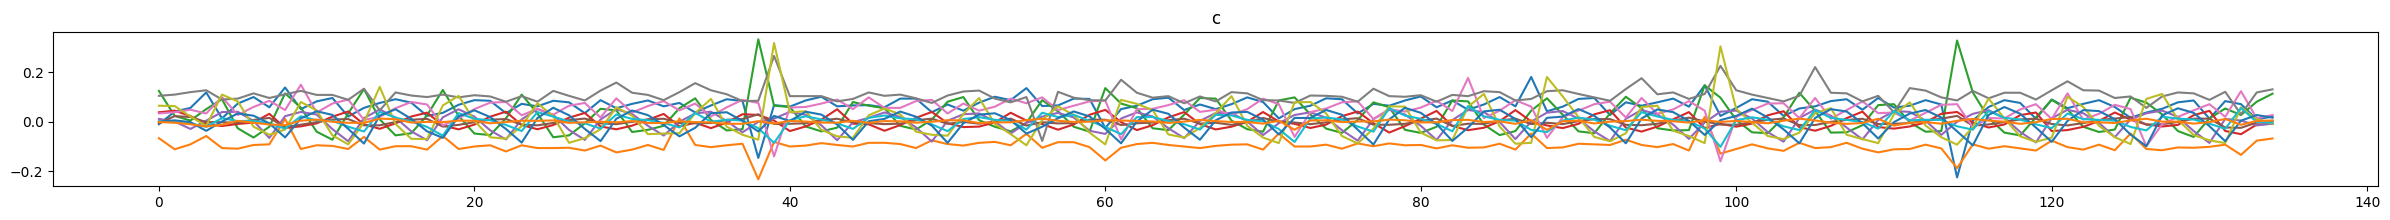

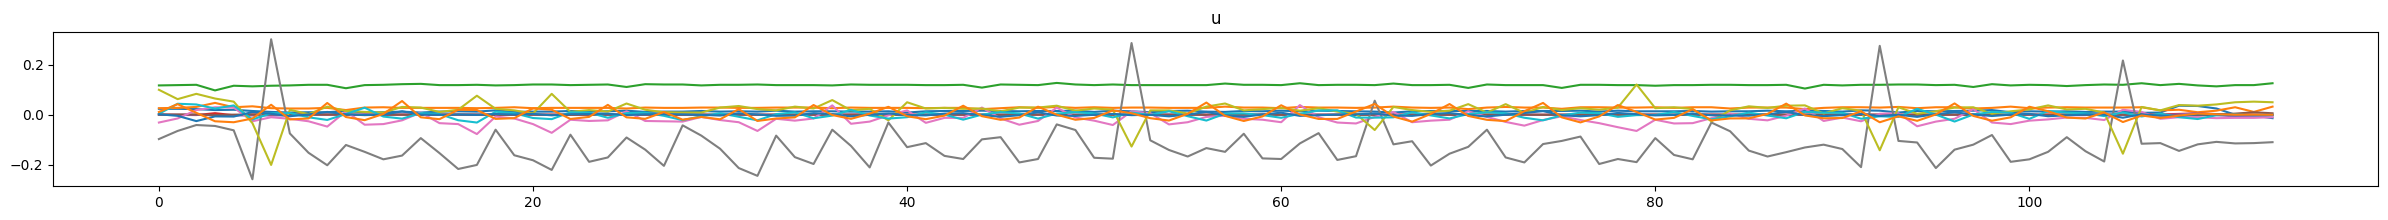

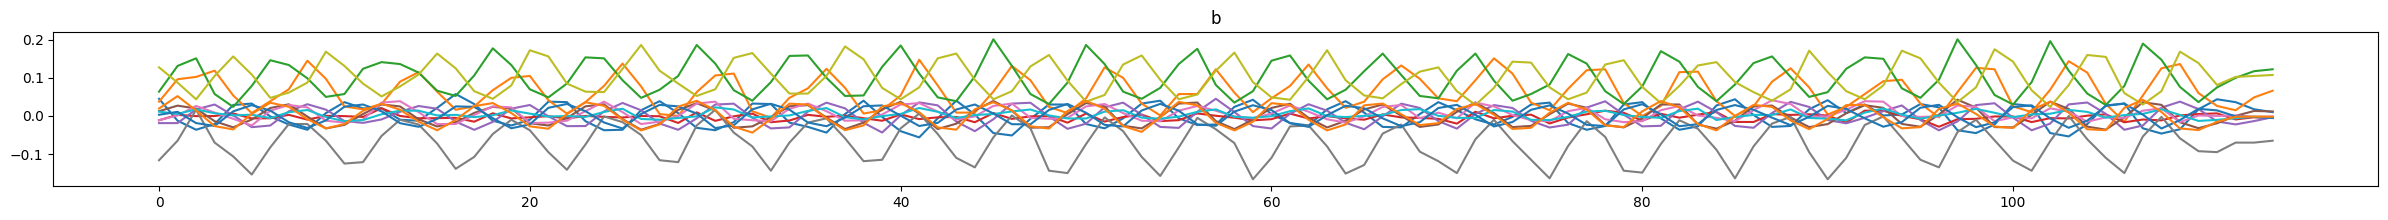

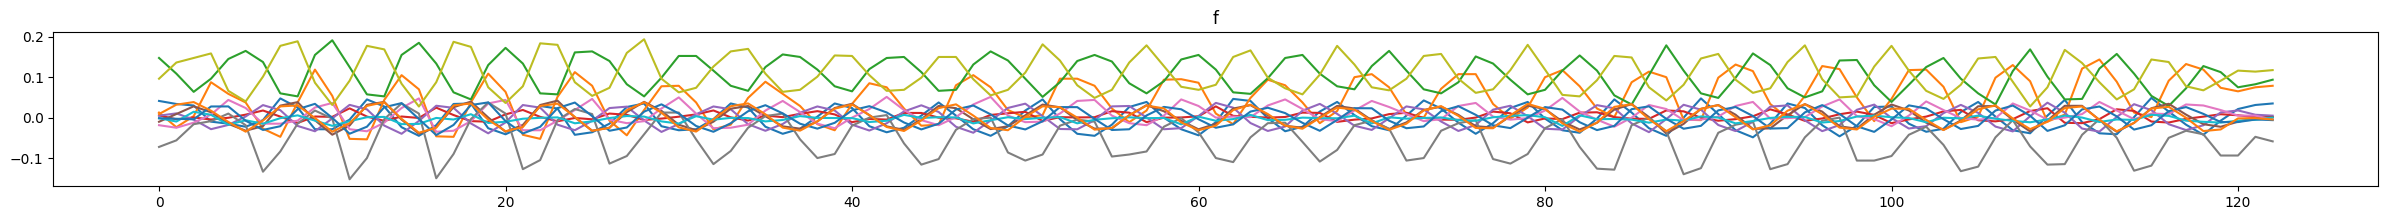

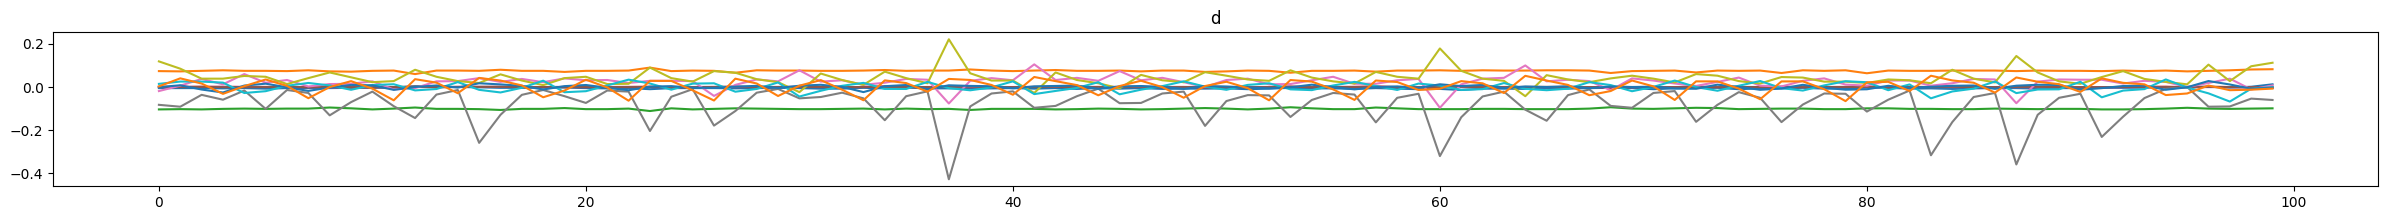

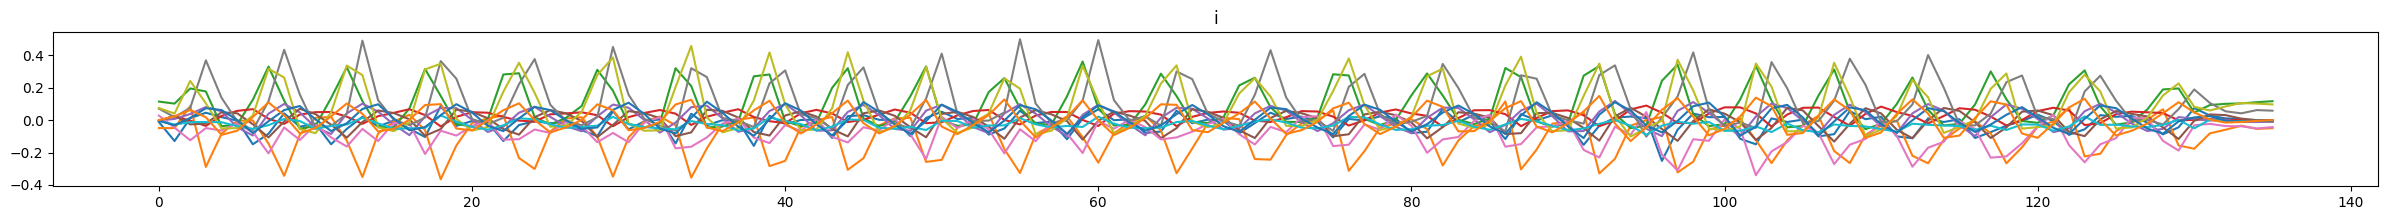

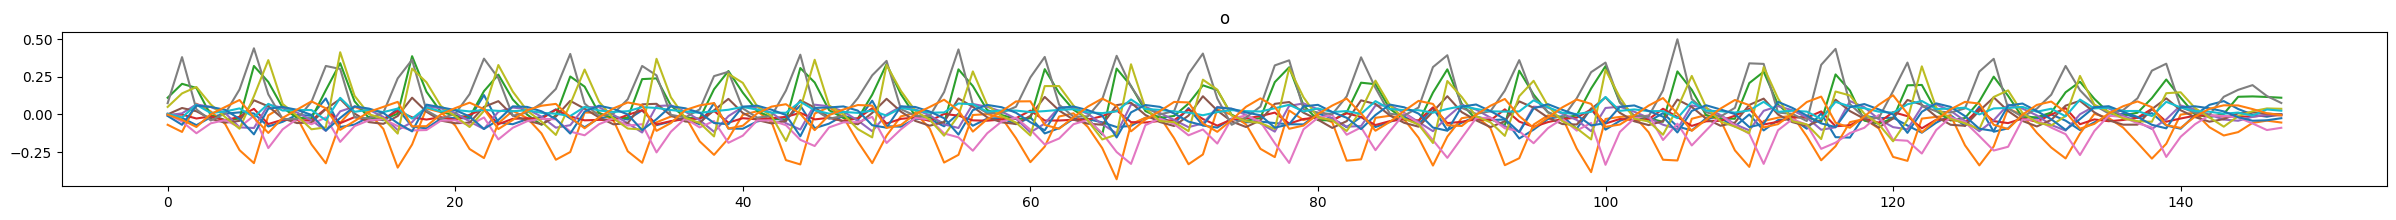

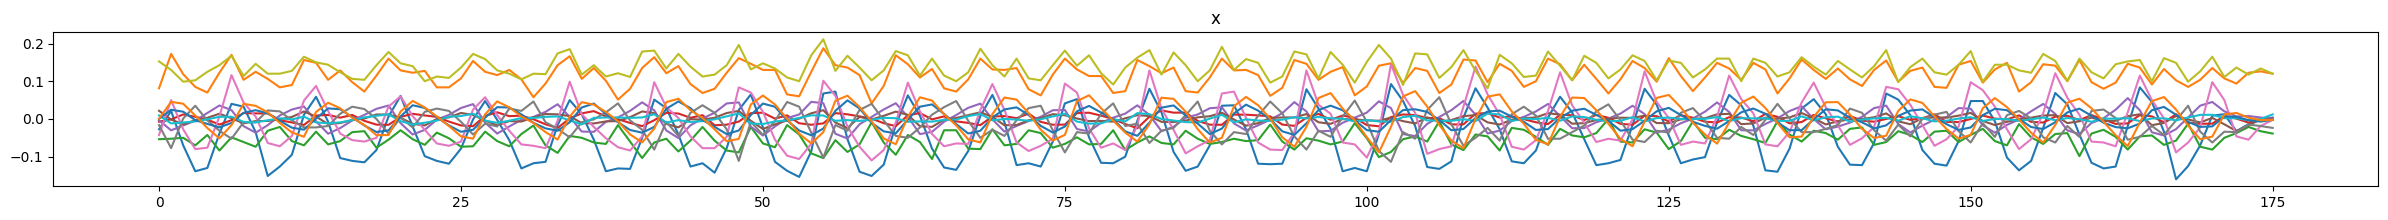

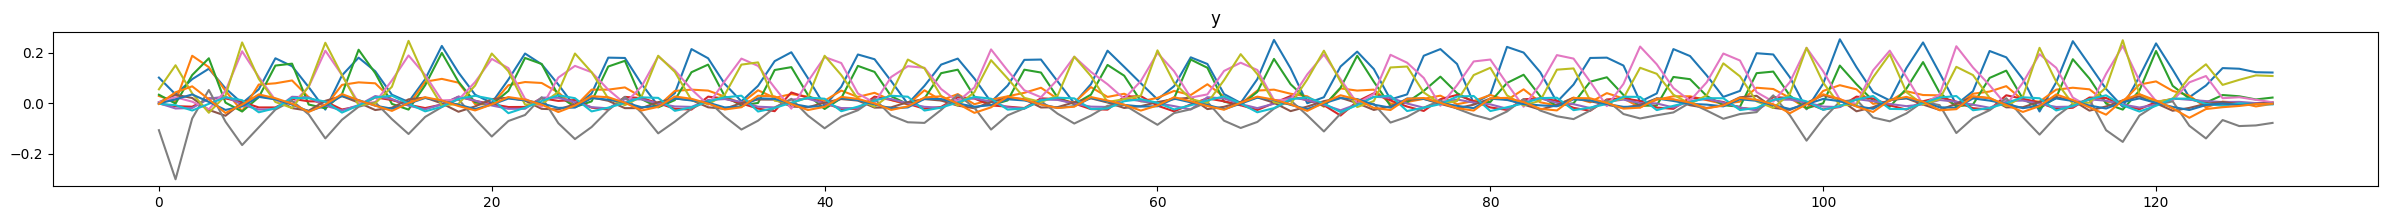

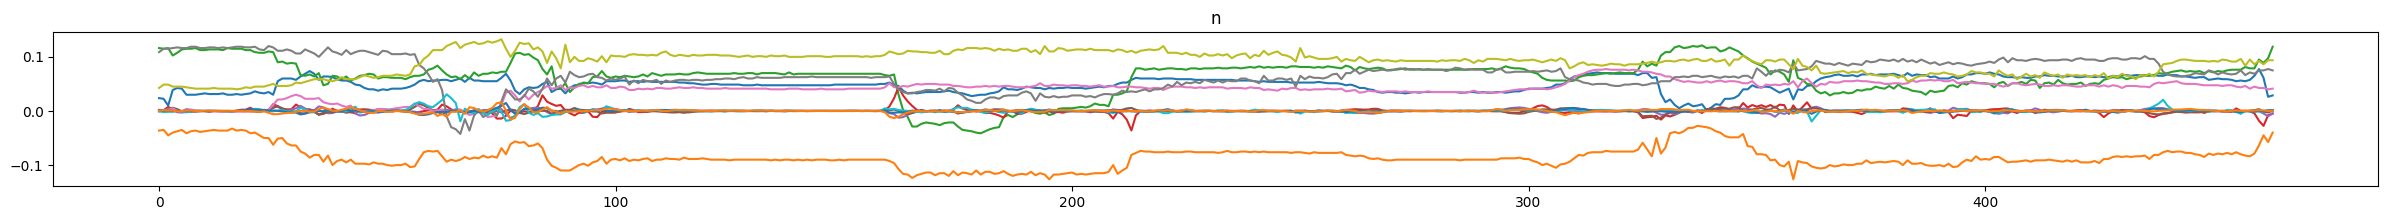

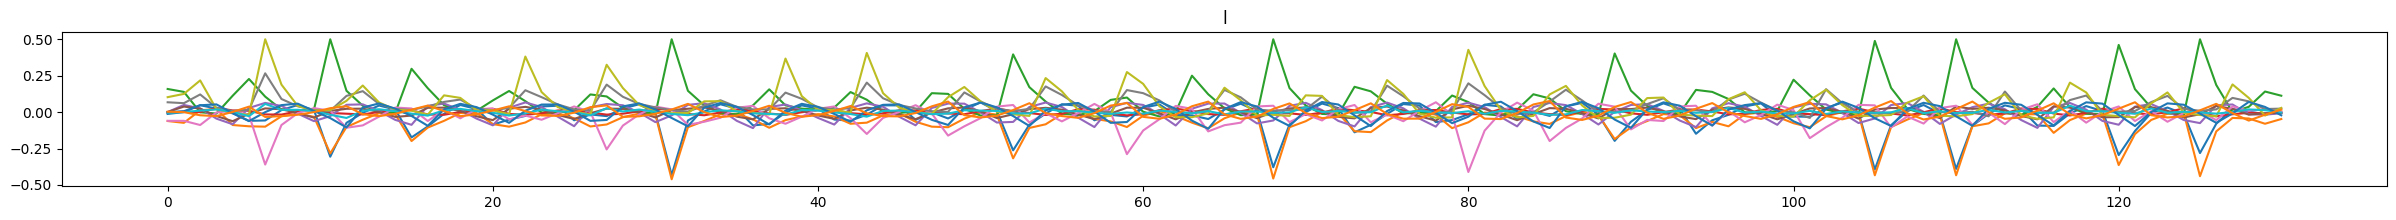

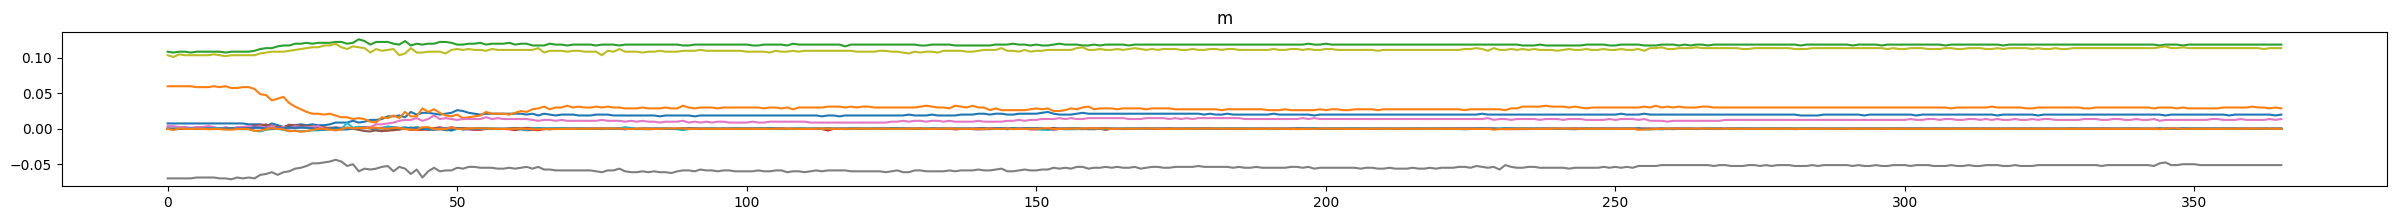

In [96]:
for gesture_name, df in data.items():
    plt.figure(figsize=(30, 2)) # Creates a new figure with specific dimensions (30 units wide, 2 units tall)
    plt.title(gesture_name)
    plt.plot(df.values[:, :-1])# Plots all columns of the DataFrame except the last one (likely excluding 'timestamp')
    plt.show()

In [97]:
# create windows of data, window size 50, overlap 49
window_size = 50
# window_size = 10
X = []
y = []
for gesture_name, df in data.items():   # item is used to return each key-value pair in the dictionary as a list of tuples
    df_values = df.values[:, :-1]
    label = gesture_name
    for i in range(0, len(df) - window_size, 1):
        X.append(df_values[i:i+window_size].flatten())
        y.append(label)
X = np.array(X)
y = np.array(y)
print(X.shape, y.shape)


(1536, 600) (1536,)


### Training

In [98]:
# split data into train and test
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# train random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
rf.fit(X_train, y_train)

(1228, 600) (308, 600) (1228,) (308,)


RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

### Evaluation

In [99]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred_rf = rf.predict(X_test)  # 预测标签
print(accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

1.0
[[ 9  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 17  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 22  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 21  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 54  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 87  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 17  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  9  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 26  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20]]


### Saving

In [100]:
# save the model
import pickle
import time

# make the model name based on the gesture names
run_timestamp = str(time.time()).replace(".", "-")
model_name = '_'.join(sorted(data.keys())) + "__" + run_timestamp

# make a model directory
model_dir = Path('./models')
model_dir.mkdir(parents=True, exist_ok=True)
with open(model_dir / f'rf_{model_name}.pkl', 'wb') as f:
    pickle.dump(rf, f)


In [101]:
print(model_name)

b_c_d_f_i_l_m_n_o_u_x_y__1742080555-274034
